In [22]:
%run func_def.ipynb

**imports loaded.

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_c

# Card file (get Path from user)

In [23]:
CARD_PATH = '../cards/ufc_card_06-17-2023.csv'
DATA_PATH = '../data/'

# main()

In [24]:
card = pd.read_csv(CARD_PATH)
card

,fighter,opponent,weight_class
0,Marvin Vettori,Jared Cannonier,Middleweight
1,Arman Tsarukyan,Joaquim Silva,Lightweight
2,Armen Petrosyan,Christian Duncan,Middleweight
3,Pat Sabatini,Lucas Almeida,Featherweight
4,Manuel Torres,Nikolas Motta,Lightweight
5,Nicolas Dalby,Muslim Salikhov,Welterweight
6,Raoni Barcelos,Miles Johns,Bantamweight
7,Jimmy Flick,Alessandro Costa,Flyweight
8,Kyung Ho Kang,Cristian Quinonez,Bantamweight
9,Carlos Hernandez,Denys Bondar,Flyweight


### Load data:

In [25]:
df = pd.read_csv(DATA_PATH + 'data_features_outliers_detected.csv')
stats = pd.read_csv(DATA_PATH + 'data_fighters_stats_processed.csv')

### Load models:

In [26]:
stat_pred = load_trained_model(file_path='../global_variables/stats_pred_general_xgboost_reg.pkl')
result_pred = load_trained_model(file_path='../global_variables/result_pred_general_logistic_reg.pkl')
method_pred = load_trained_model(file_path='../global_variables/method_pred_knn_classifier.pkl')

### Set matches:

In [27]:
data = []
for i in range(len(card)):
    fighter = card.loc[i,'fighter']
    opponent = card.loc[i,'opponent']
    fighter_stats = stats[stats.name==fighter]
    opponent_stats = stats[stats.name==opponent]

    if (len(fighter_stats) > 0) & (len(opponent_stats) > 0):
        match = {'result':None,
             'fighter':fighter_stats['name'].tolist().pop(),
             'opponent':opponent_stats['name'].tolist().pop(),
             'date':None,
             'weight_class':card[(card.fighter==fighter)&(card.opponent==opponent)]['weight_class'].tolist().pop(),
             'method':None,
             'type':None,
             'kd_dif':None,
             'str_dif':None,
             'td_dif':None,
             'sub_dif':None,
             'td_avg_dif':round(fighter_stats['td_avg'].tolist().pop() - opponent_stats['td_avg'].tolist().pop(),4),
             'td_def_dif':round(fighter_stats['td_def'].tolist().pop() - opponent_stats['td_def'].tolist().pop(),4),
             'sub_avg_dif':round(fighter_stats['sub_avg'].tolist().pop() - opponent_stats['sub_avg'].tolist().pop(),4),
             'slpm_dif':round(fighter_stats['slpm'].tolist().pop() - opponent_stats['slpm'].tolist().pop(),4),
             'str_acc_dif':round(fighter_stats['str_acc'].tolist().pop() - opponent_stats['str_acc'].tolist().pop(),4),
             'sapm_dif':round(fighter_stats['sapm'].tolist().pop() - opponent_stats['sapm'].tolist().pop(),4),
             'str_def_dif':round(fighter_stats['str_def'].tolist().pop() - opponent_stats['str_def'].tolist().pop(),4),
             'str_efc_dif':0,
             'stance_win_ratio':get_stance_wins_ratio(fighter=fighter, stats_data=stats) - get_stance_wins_ratio(fighter=opponent, stats_data=stats),
             'win_perc_dif':round(get_win_prob(name=fighter, date=get_current_date(), df=df) - get_win_prob(name=opponent, date=get_current_date(), df=df),4),
             'win_strk_dif':get_win_streak(name=fighter, date=get_current_date(), df=df) - get_win_streak(name=opponent, date=get_current_date(), df=df),
             'lose_strk_dif':get_lose_streak(name=fighter, date=get_current_date(), df=df) - get_lose_streak(name=opponent, date=get_current_date(), df=df),
             'outlier':None,
             'lof_outlier':None
            }
        data.append(match)
    else:
        print(f"(Match error)Data found: {fighter}={len(fighter_stats)>0} vs {opponent}={len(opponent_stats)>0}")
        
data = pd.DataFrame.from_dict(data)     
data

(Match error)Data found: Zhalgas Zhumagulov=True vs Felipe Bunes=False


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
0,None,Marvin Vettori,Jared Cannonier,None,Middleweight,None,None,None,None,None,None,1.60,0.11,0.5,0.38,-0.06,-0.21,-0.02,0,-0.0318,0.2000,-1,2,None,None
1,None,Arman Tsarukyan,Joaquim Silva,None,Lightweight,None,None,None,None,None,None,3.09,0.10,-0.6,-0.52,0.06,-2.65,-0.01,0,-0.0157,0.4464,6,-1,None,None
2,None,Armen Petrosyan,Christian Duncan,None,Middleweight,None,None,None,None,None,None,0.00,0.25,0.0,1.17,-0.13,0.61,0.25,0,-0.0475,0.3333,0,1,None,None
3,None,Pat Sabatini,Lucas Almeida,None,Featherweight,None,None,None,None,None,None,3.75,-0.08,1.9,-4.93,0.08,-4.13,0.04,0,0.0000,-0.8000,-1,2,None,None
4,None,Manuel Torres,Nikolas Motta,None,Lightweight,None,None,None,None,None,None,0.00,0.00,0.0,7.13,0.21,-0.80,-0.02,0,0.0000,-1.0000,-1,1,None,None
5,None,Nicolas Dalby,Muslim Salikhov,None,Welterweight,None,None,None,None,None,None,-0.11,-0.12,0.1,0.44,-0.08,0.92,-0.14,0,0.0000,0.1964,1,0,None,None
6,None,Raoni Barcelos,Miles Johns,None,Bantamweight,None,None,None,None,None,None,0.77,0.01,0.4,2.06,0.04,2.21,-0.08,0,0.0000,-0.1000,1,-1,None,None
7,None,Jimmy Flick,Alessandro Costa,None,Flyweight,None,None,None,None,None,None,2.13,-0.87,5.7,-0.38,0.27,0.25,-0.18,0,0.0000,1.0000,1,-1,None,None
8,None,Kyung Ho Kang,Cristian Quinonez,None,Bantamweight,None,None,None,None,None,None,1.18,-0.30,0.8,-2.22,0.07,-1.73,-0.04,0,0.0000,0.5000,0,0,None,None
9,None,Carlos Hernandez,Denys Bondar,None,Flyweight,None,None,None,None,None,None,-10.08,0.66,0.5,2.00,-0.33,1.92,-0.27,0,0.0000,1.0000,1,0,None,None


# Statistics predictions:

In [155]:
data[['kd_dif','str_dif','td_dif','sub_dif']] = stat_pred.predict(data[stat_pred.feature_names_in_])
data['result'] = result_pred.predict(data[result_pred.feature_names_in_])
data['win_prob'] = np.max(result_pred.predict_proba(data[result_pred.feature_names_in_]),axis=1)

In [156]:
for i in range(len(data)):
    data.loc[i,'result'] = int(1) if data.loc[i,'result'] == 'win' else int(0)

data.tail(3)    

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_prob,method_prob
10,1,Tereza Bleda,Gabriella Fernandes,None,Women's Flyweight,submission,None,0.179804,0.222836,0.157502,1.467955,1.13,0.33,1.1,0.84,0.04,0.44,-0.11,0,-0.0157,0.0,0,-1,None,None,0.872412,0.42
11,0,Dan Argueta,Ronnie Lawrence,None,Bantamweight,decision,None,0.487097,-0.775016,-0.370700,0.593860,-4.53,0.03,0.7,-0.41,-0.05,-0.22,-0.01,0,-0.0318,0.0,0,0,None,None,0.518255,0.57
12,1,Zac Pauga,Modestas Bukauskas,None,Light Heavyweight,decision,None,-0.232945,3.168872,0.060541,0.207582,0.00,0.29,0.0,1.05,0.29,-2.03,0.15,0,-0.0475,-0.8,-3,2,None,None,0.996483,0.67


In [157]:
data['method'] = method_pred.predict(data[method_pred.feature_names_in_])
data['method_prob'] = np.max(method_pred.predict_proba(data[method_pred.feature_names_in_]),axis=1)

In [158]:
for i in range(len(data)):
    data.loc[i,'result'] = 'win' if data.loc[i,'result'] == int(1) else 'lose'

data.tail(3)    

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,win_prob,method_prob
10,win,Tereza Bleda,Gabriella Fernandes,None,Women's Flyweight,submission,None,0.179804,0.222836,0.157502,1.467955,1.13,0.33,1.1,0.84,0.04,0.44,-0.11,0,-0.0157,0.0,0,-1,None,None,0.872412,0.42
11,lose,Dan Argueta,Ronnie Lawrence,None,Bantamweight,decision,None,0.487097,-0.775016,-0.370700,0.593860,-4.53,0.03,0.7,-0.41,-0.05,-0.22,-0.01,0,-0.0318,0.0,0,0,None,None,0.518255,0.57
12,win,Zac Pauga,Modestas Bukauskas,None,Light Heavyweight,decision,None,-0.232945,3.168872,0.060541,0.207582,0.00,0.29,0.0,1.05,0.29,-2.03,0.15,0,-0.0475,-0.8,-3,2,None,None,0.996483,0.67


# Final results:

In [159]:
data_present = data.copy()
for i in range(len(data)):
    data_present.loc[i,'result'] = data_present.loc[i,'fighter'] if data_present.loc[i,'result'] == 'win' else data_present.loc[i,'opponent']
    
data_present = data_present.rename(columns={'result':'W'})    

In [160]:
data_present[['fighter','opponent','weight_class','W','win_prob','method','method_prob','str_dif','kd_dif','td_dif','sub_dif']]

,fighter,opponent,weight_class,W,win_prob,method,method_prob,str_dif,kd_dif,td_dif,sub_dif
0,Marvin Vettori,Jared Cannonier,Middleweight,Jared Cannonier,0.874463,knockout,0.44,-0.367645,-0.713222,0.037030,-0.188585
1,Arman Tsarukyan,Joaquim Silva,Lightweight,Arman Tsarukyan,0.806894,decision,0.52,0.164391,0.152424,1.408623,-0.379105
2,Armen Petrosyan,Christian Duncan,Middleweight,Armen Petrosyan,0.716223,decision,0.54,0.788855,-0.237760,-0.355367,-0.192892
3,Pat Sabatini,Lucas Almeida,Featherweight,Pat Sabatini,0.514079,knockout,0.40,0.866488,-0.646581,0.421967,-0.427852
4,Manuel Torres,Nikolas Motta,Lightweight,Manuel Torres,0.988090,decision,0.51,1.676234,1.141826,0.290099,0.380055
5,Nicolas Dalby,Muslim Salikhov,Welterweight,Muslim Salikhov,0.860177,knockout,0.44,-0.556235,-0.547639,-0.244864,-0.099943
6,Raoni Barcelos,Miles Johns,Bantamweight,Miles Johns,0.684391,decision,0.47,-0.370490,-0.295962,0.131124,0.148933
7,Jimmy Flick,Alessandro Costa,Flyweight,Alessandro Costa,0.670755,submission,0.36,-0.371174,-1.187659,0.338697,1.652924
8,Kyung Ho Kang,Cristian Quinonez,Bantamweight,Kyung Ho Kang,0.954548,decision,0.56,-0.016858,0.338028,1.484957,1.635256
9,Carlos Hernandez,Denys Bondar,Flyweight,Denys Bondar,0.633624,decision,0.59,-0.674925,-0.553429,-1.388573,0.779629


# Model visualization:

In [38]:
all_data = pd.concat([data[df.columns],df]).reset_index(drop=True)
all_data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6404,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.341659,0.384238,1.182042,-0.008752,1.633408,0.864923,0.2,0.437681,0.473642,-0.833962,0.849897,0.00651,0.232252,1.412053,1.122819,-0.018188,False,False
6405,win,Elise Reed,Jinh Yu Frey,2023-06-03,Women's Strawweight,U-DEC,Unanimous,0.004210,0.899464,-1.175651,-0.008752,-0.199954,-1.345974,-0.3,-0.013941,0.638938,-0.606841,0.066464,0.00758,-1.880897,0.248877,0.009144,-0.018188,False,False
6406,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,0.004210,-1.419052,0.003196,0.852188,0.057950,0.726742,-0.2,0.581949,0.060402,2.049208,-0.368777,0.00000,-1.259599,0.001393,0.009144,-0.018188,False,False


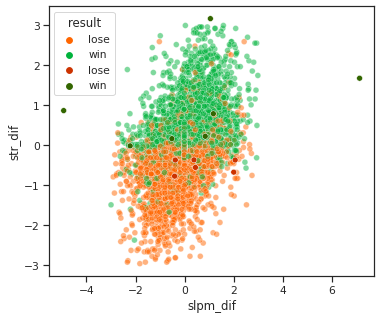

In [138]:
GREEN = '#00b33c'
ORANGE = '#ff6600'
OVERLAY_GREEN = '#336600'
OVERLAY_ORANGE = '#cc3300'
FEATURE = 'slpm_dif'
ax = plt.subplots(figsize=(6,5), dpi=70)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=all_data[all_data.outlier==False], hue='result',palette=[ORANGE,GREEN],hue_order=['lose','win'], alpha=0.5)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=data, hue='result', palette=[OVERLAY_ORANGE,OVERLAY_GREEN],hue_order=['lose','win'], alpha=1)

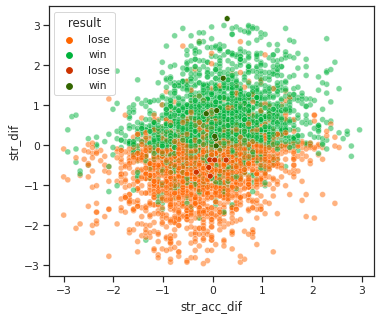

In [141]:
GREEN = '#00b33c'
ORANGE = '#ff6600'
OVERLAY_GREEN = '#336600'
OVERLAY_ORANGE = '#cc3300'
FEATURE = 'str_acc_dif'
ax = plt.subplots(figsize=(6,5), dpi=70)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=all_data[all_data.outlier==False], hue='result',palette=[ORANGE,GREEN],hue_order=['lose','win'],alpha=0.5)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=data, hue='result', palette=[OVERLAY_ORANGE,OVERLAY_GREEN],hue_order=['lose','win'], alpha=1)

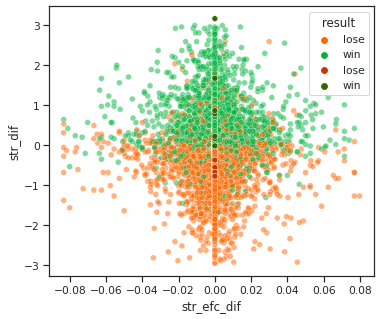

In [142]:
GREEN = '#00b33c'
ORANGE = '#ff6600'
OVERLAY_GREEN = '#336600'
OVERLAY_ORANGE = '#cc3300'
FEATURE = 'str_efc_dif'
ax = plt.subplots(figsize=(6,5), dpi=70)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=all_data[all_data.outlier==False], hue='result',palette=[ORANGE,GREEN],hue_order=['lose','win'],alpha=0.5)
ax = sns.scatterplot(y='str_dif',x=FEATURE,data=data, hue='result', palette=[OVERLAY_ORANGE,OVERLAY_GREEN],hue_order=['lose','win'], alpha=1)

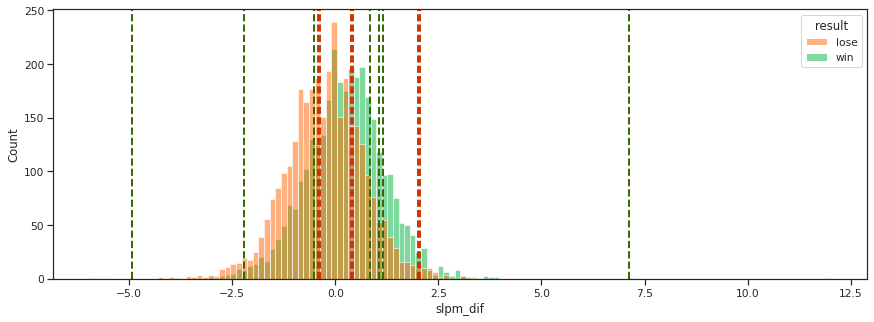

In [144]:
FEATURE = 'slpm_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.slpm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")

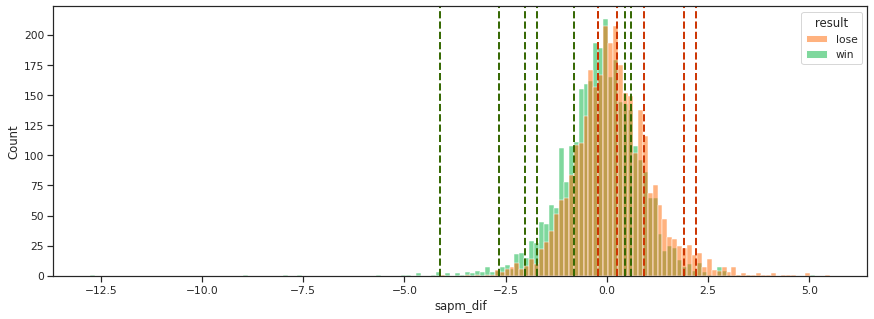

In [135]:
FEATURE = 'sapm_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.sapm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")

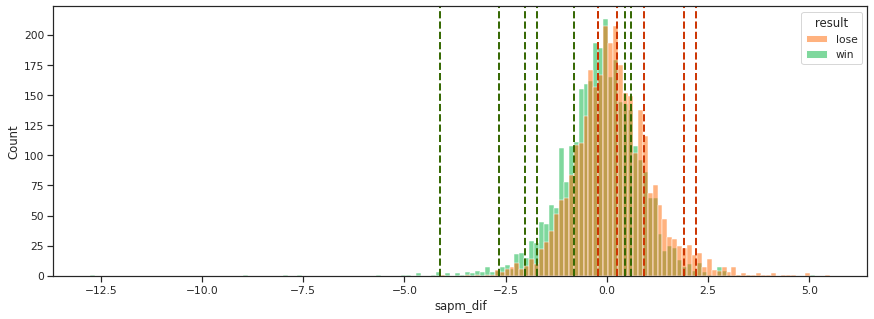

In [136]:
FEATURE = 'sapm_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.sapm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")

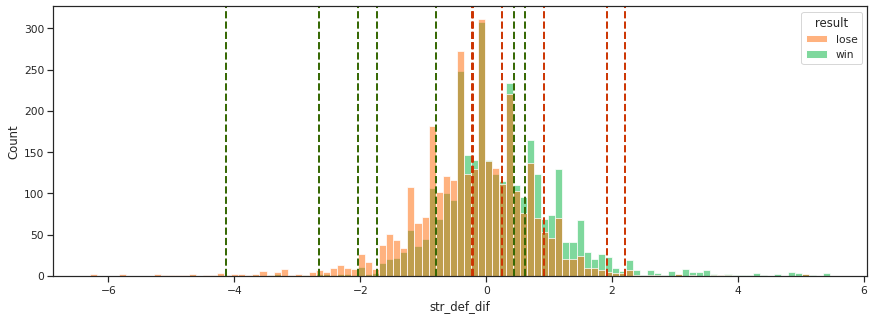

In [154]:
FEATURE = 'str_def_dif'
ax = plt.subplots(figsize=(15,5), dpi=70)
ax = sns.histplot(x=FEATURE, data=all_data, hue='result', palette=[ORANGE,GREEN])
for value,result in zip(data.sapm_dif,data.result):
    COLOR = OVERLAY_GREEN if result=='win' else OVERLAY_ORANGE
    ax.axvline(x=value, color=COLOR, linestyle="--")